Set Up for KNN - K Nearest Neighbors (KNN) algorithm used to solve classification and regression problems. Assumes similar things exist in close proximity.
*Indep Var(s) and Dep Variable(what we are tying to guess given the ind variables. )
Steps - Data, Initialize K to chosen # of neighbors, for each example in data, calculate distance between query example and current example from data. Add distance and the index of the example to an ordered collection. sort the Ord Collection of distances and indices from smallest to largest by distance. Pick the first K entries from sorted collecion, gt labels off the selected K entries, if regression, return the mean (avg) of th K labels, if classification, return the mode (most rep value) of K label ()


In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\cgotb\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
#create dataframes, use numpy to display process
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

Read the CSV and Perform Basic Data Cleaning

In [4]:
#read csv and do data mungling by dropping/removing nulls
exo_df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
exo_df = exo_df.dropna(axis='columns', how='all')
# Drop the null rows
exo_df = exo_df.dropna()
exo_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


Select your features (columns)

In [5]:
# Data processing and prep
#Set features/columns that will also be used as your x values (for bottom axis/intercept.)
#data_element_features = df[["names", "of", "selected", "features", "here"]]
data_element_features = exo_df[["koi_disposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec","koi_period","koi_duration", "koi_depth", "koi_prad", "koi_teq", "koi_insol", "koi_slogg","koi_kepmag", "koi_impact", "dec", "koi_tce_plnt_num"]]
data_element_features.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_slogg,koi_kepmag,koi_impact,dec,koi_tce_plnt_num
0,CONFIRMED,0,0,0,0,54.418383,4.50700,874.8,2.83,443,9.11,4.467,15.347,0.586,48.141651,2
1,FALSE POSITIVE,0,1,0,0,19.899140,1.78220,10829.0,14.60,638,39.30,4.544,15.436,0.969,48.134129,1
2,FALSE POSITIVE,0,1,0,0,1.736952,2.40641,8079.2,33.46,1395,891.96,4.564,15.597,1.276,48.285210,1
3,CONFIRMED,0,0,0,0,2.525592,1.65450,603.3,2.75,1406,926.16,4.438,15.509,0.701,48.226200,1
4,CONFIRMED,0,0,0,0,4.134435,3.14020,686.0,2.77,1160,427.65,4.486,15.714,0.762,48.224670,2


Create a Train Test Split
Use koi_disposition for the y values

In [6]:
# split x and y values into two variables, (one to train and one to test) (separate)
# we do this to note outliers in data 
#This is the data we will split, part to train, separate to test(random)
x = data_element_features[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec","koi_period","koi_duration", "koi_depth", "koi_prad", "koi_teq", "koi_insol", "koi_slogg","koi_kepmag", "koi_impact", "dec","koi_tce_plnt_num"]]
y = data_element_features["koi_disposition"]
print(x.shape, y.shape)

(6991, 15) (6991,)


In [7]:
#train split/separated data
# Create a StandardScater model and fit it to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_slogg,koi_kepmag,koi_impact,dec,koi_tce_plnt_num
3563,0,0,0,0,10.548413,1.8720,102.9,3.89,899,154.84,4.387,13.204,1.0170,44.737061,2
4099,0,0,0,0,24.754385,3.3900,593.3,2.10,491,13.70,4.519,15.514,0.7090,42.576248,1
5460,0,0,0,0,1.057336,1.5795,47337.0,14.59,1276,623.51,4.594,15.414,0.2620,49.310040,1
1091,0,0,0,0,201.118319,10.3280,584.8,2.28,300,1.92,4.447,13.328,0.0010,48.131390,1
5999,0,0,0,0,91.649983,10.2940,193.6,2.27,568,24.57,4.145,12.964,0.2136,39.812420,2


In [8]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(x_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

 K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.766
k: 3, Train/Test Score: 0.885/0.796
k: 5, Train/Test Score: 0.862/0.796
k: 7, Train/Test Score: 0.848/0.806
k: 9, Train/Test Score: 0.839/0.808
k: 11, Train/Test Score: 0.833/0.816
k: 13, Train/Test Score: 0.827/0.817
k: 15, Train/Test Score: 0.828/0.811
k: 17, Train/Test Score: 0.828/0.809
k: 19, Train/Test Score: 0.823/0.808


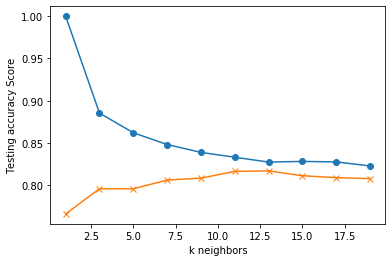

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    test_score = knn.score(x_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(x_test_scaled, y_test))

k=13 Test Acc: 0.817


In [12]:
# Choice of k here could depend on a few things:
# - best test performance
# - balance of complexity vs run-time (higher k is more complex model, and takes longer to run)
# - closest performance between train and test

In [13]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [14]:
# Create the GridSearch CV modelstimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
#This will take the model and try each combination of parameters.
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.795, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.793, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.788, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.803, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.795, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.800, total=   0.6s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.793, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.788, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
# Determine best parameter and best score
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7959183227937912


Save the Model

In [17]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = "KNN Model.sav"
joblib.dump(knn, filename)

['KNN Model.sav']